<a href="https://colab.research.google.com/github/shik28/Handwritten-digit_recognition/blob/main/CNN_Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data=tf.keras.datasets.mnist
(train_img,train_lbl),(test_img, test_lbl)=data.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_img.shape)

(60000, 28, 28)


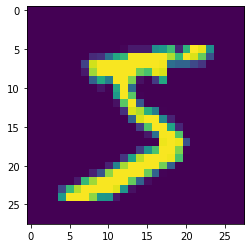

In [4]:
plt.imshow(train_img[0])

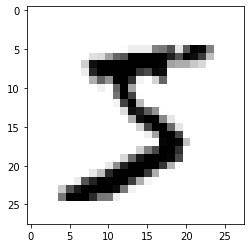

In [5]:
plt.imshow(train_img[0], cmap=plt.cm.binary)

In [6]:
#before normalizing
print(train_img[0])  

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

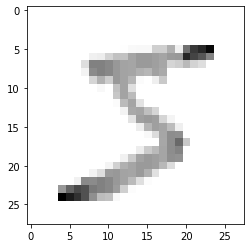

In [7]:
# normalization
#we can use either built in or /255
train_img=tf.keras.utils.normalize(train_img, axis=1)
test_img=tf.keras.utils.normalize(test_img, axis=1)
plt.imshow(train_img[0], cmap=plt.cm.binary)


In [8]:
print(train_img[0]) 

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
#resizing 
train_img=np.array(train_img).reshape(-1, 28, 28, 1)
test_img=np.array(test_img).reshape(-1, 28, 28, 1)
print(train_img.shape)
print(test_img.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
model=tf.keras.models.Sequential()

#layer 1
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=train_img.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#layer 2
model.add(tf.keras.layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#layer 3
model.add(tf.keras.layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#fully connected layer 1
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))

#fully connected layer 2
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))

#last fully connected layer
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))




In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [12]:
model.fit(train_img, train_lbl, epochs=5, validation_split=0.5)

Epoch 1/5
938/938 [==============================] - 52s 55ms/step - loss: 0.8310 - accuracy: 0.7243 - val_loss: 0.1564 - val_accuracy: 0.9502
Epoch 2/5
938/938 [==============================] - 54s 57ms/step - loss: 0.1466 - accuracy: 0.9561 - val_loss: 0.1289 - val_accuracy: 0.9611
Epoch 3/5
938/938 [==============================] - 51s 55ms/step - loss: 0.0892 - accuracy: 0.9716 - val_loss: 0.1010 - val_accuracy: 0.9697
Epoch 4/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0683 - accuracy: 0.9783 - val_loss: 0.0890 - val_accuracy: 0.9727
Epoch 5/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0512 - accuracy: 0.9839 - val_loss: 0.0788 - val_accuracy: 0.9765


In [13]:
print(model.evaluate(test_img,test_lbl))

313/313 [==============================] - 4s 13ms/step - loss: 0.0757 - accuracy: 0.9763
[0.07572631537914276, 0.9763000011444092]


In [14]:
result=model.predict(test_img)

In [15]:
print(np.argmax(result[7]))


9


In [16]:
print(test_lbl[7])

9


In [17]:
import cv2

In [18]:
pic=cv2.imread('pic1.png')

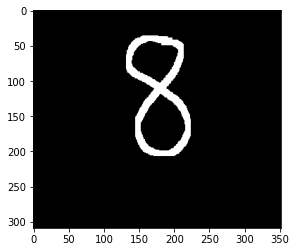

In [19]:
plt.imshow(pic)

In [20]:
gray=cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
adjusted_pic=cv2.resize(gray, (28, 28), interpolation= cv2.INTER_AREA)

In [21]:

new_img=tf.keras.utils.normalize(adjusted_pic, axis=1)
new_img=np.array(new_img).reshape(-1, 28, 28, 1)
print(new_img.shape)

(1, 28, 28, 1)


In [22]:
pred=model.predict(new_img)

In [23]:
print(np.argmax(pred))

8


In [24]:
#model perfectly predicted